In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv("C:/Users/DELL E5490/Downloads/archive (2) (1).zip")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [49]:
data['Order Date']=pd.DatetimeIndex(data['Order Date'])
data['Ship Date']=pd.DatetimeIndex(data['Ship Date'])
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Postel Code,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,42420.0,2017,2017,2017,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,42420.0,2017,2017,2017,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,90036.0,2017,2017,2017,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,33311.0,2016,2016,2016,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,33311.0,2016,2016,2016,Thursday


In [50]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    data_check=pd.DataFrame(l)
    data_check.columns=['columns', 'dtypes','nunique','sum_null']
    return data_check
check(data)

,columns,dtypes,nunique,sum_null
0,Row ID,int64,<bound method IndexOpsMixin.nunique of 0 ...,0
1,Order ID,object,<bound method IndexOpsMixin.nunique of 0 ...,0
2,Order Date,datetime64[ns],<bound method IndexOpsMixin.nunique of 0 ...,0
3,Ship Date,datetime64[ns],<bound method IndexOpsMixin.nunique of 0 ...,0
4,Ship Mode,object,<bound method IndexOpsMixin.nunique of 0 ...,0
5,Customer ID,object,<bound method IndexOpsMixin.nunique of 0 ...,0
6,Customer Name,object,<bound method IndexOpsMixin.nunique of 0 ...,0
7,Segment,object,<bound method IndexOpsMixin.nunique of 0 ...,0
8,Country,object,<bound method IndexOpsMixin.nunique of 0 ...,0
9,City,object,<bound method IndexOpsMixin.nunique of 0 ...,0


In [51]:
data[data['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Postel Code,Year,Month,Day,Day of Week
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,5401.0,2018,2018,2018,Saturday
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,5401.0,2016,2016,2016,Monday
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5401.0,2017,2017,2017,Sunday
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,5401.0,2017,2017,2017,Monday
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,5401.0,2017,2017,2017,Monday
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,5401.0,2017,2017,2017,Monday
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,5401.0,2018,2018,2018,Friday
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,5401.0,2018,2018,2018,Friday
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,5401.0,2018,2018,2018,Friday
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,5401.0,2018,2018,2018,Friday


In [52]:
data['Postel Code']=data['Postal Code'].fillna(5401.0)

<AxesSubplot:>

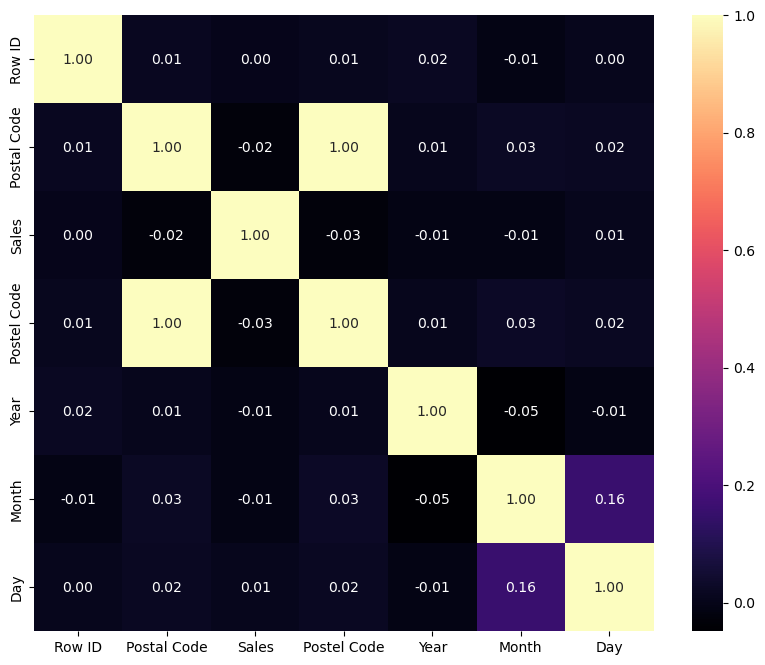

In [99]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="magma",fmt='.2f')


In [72]:
data['Year']=pd.DatetimeIndex(data['Order Date']).year
data['Month']=pd.DatetimeIndex(data['Order Date']).month
data['Day']=pd.DatetimeIndex(data['Order Date']).day
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Postel Code,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,42420.0,2017,8,11,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,42420.0,2017,8,11,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,90036.0,2017,12,6,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,33311.0,2016,11,10,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,33311.0,2016,11,10,Thursday


In [73]:
data['Day of Week']=data['Order Date'].dt.strftime('%A')

In [74]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Postel Code,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,42420.0,2017,8,11,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,42420.0,2017,8,11,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,90036.0,2017,12,6,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,33311.0,2016,11,10,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,33311.0,2016,11,10,Thursday


In [75]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48
Postel Code,9800.0,55217.343265,32066.750532,1040.000,23223.000,57551.00,90008.000,99301.00
Year,9800.0,2016.724184,1.123984,2015.000,2016.000,2017.00,2018.000,2018.00
Month,9800.0,7.186122,3.424108,1.000,4.000,8.00,10.000,12.00
Day,9800.0,16.119184,8.073122,1.000,10.000,16.00,23.000,31.00


Text(0.5, 1.0, 'Month')

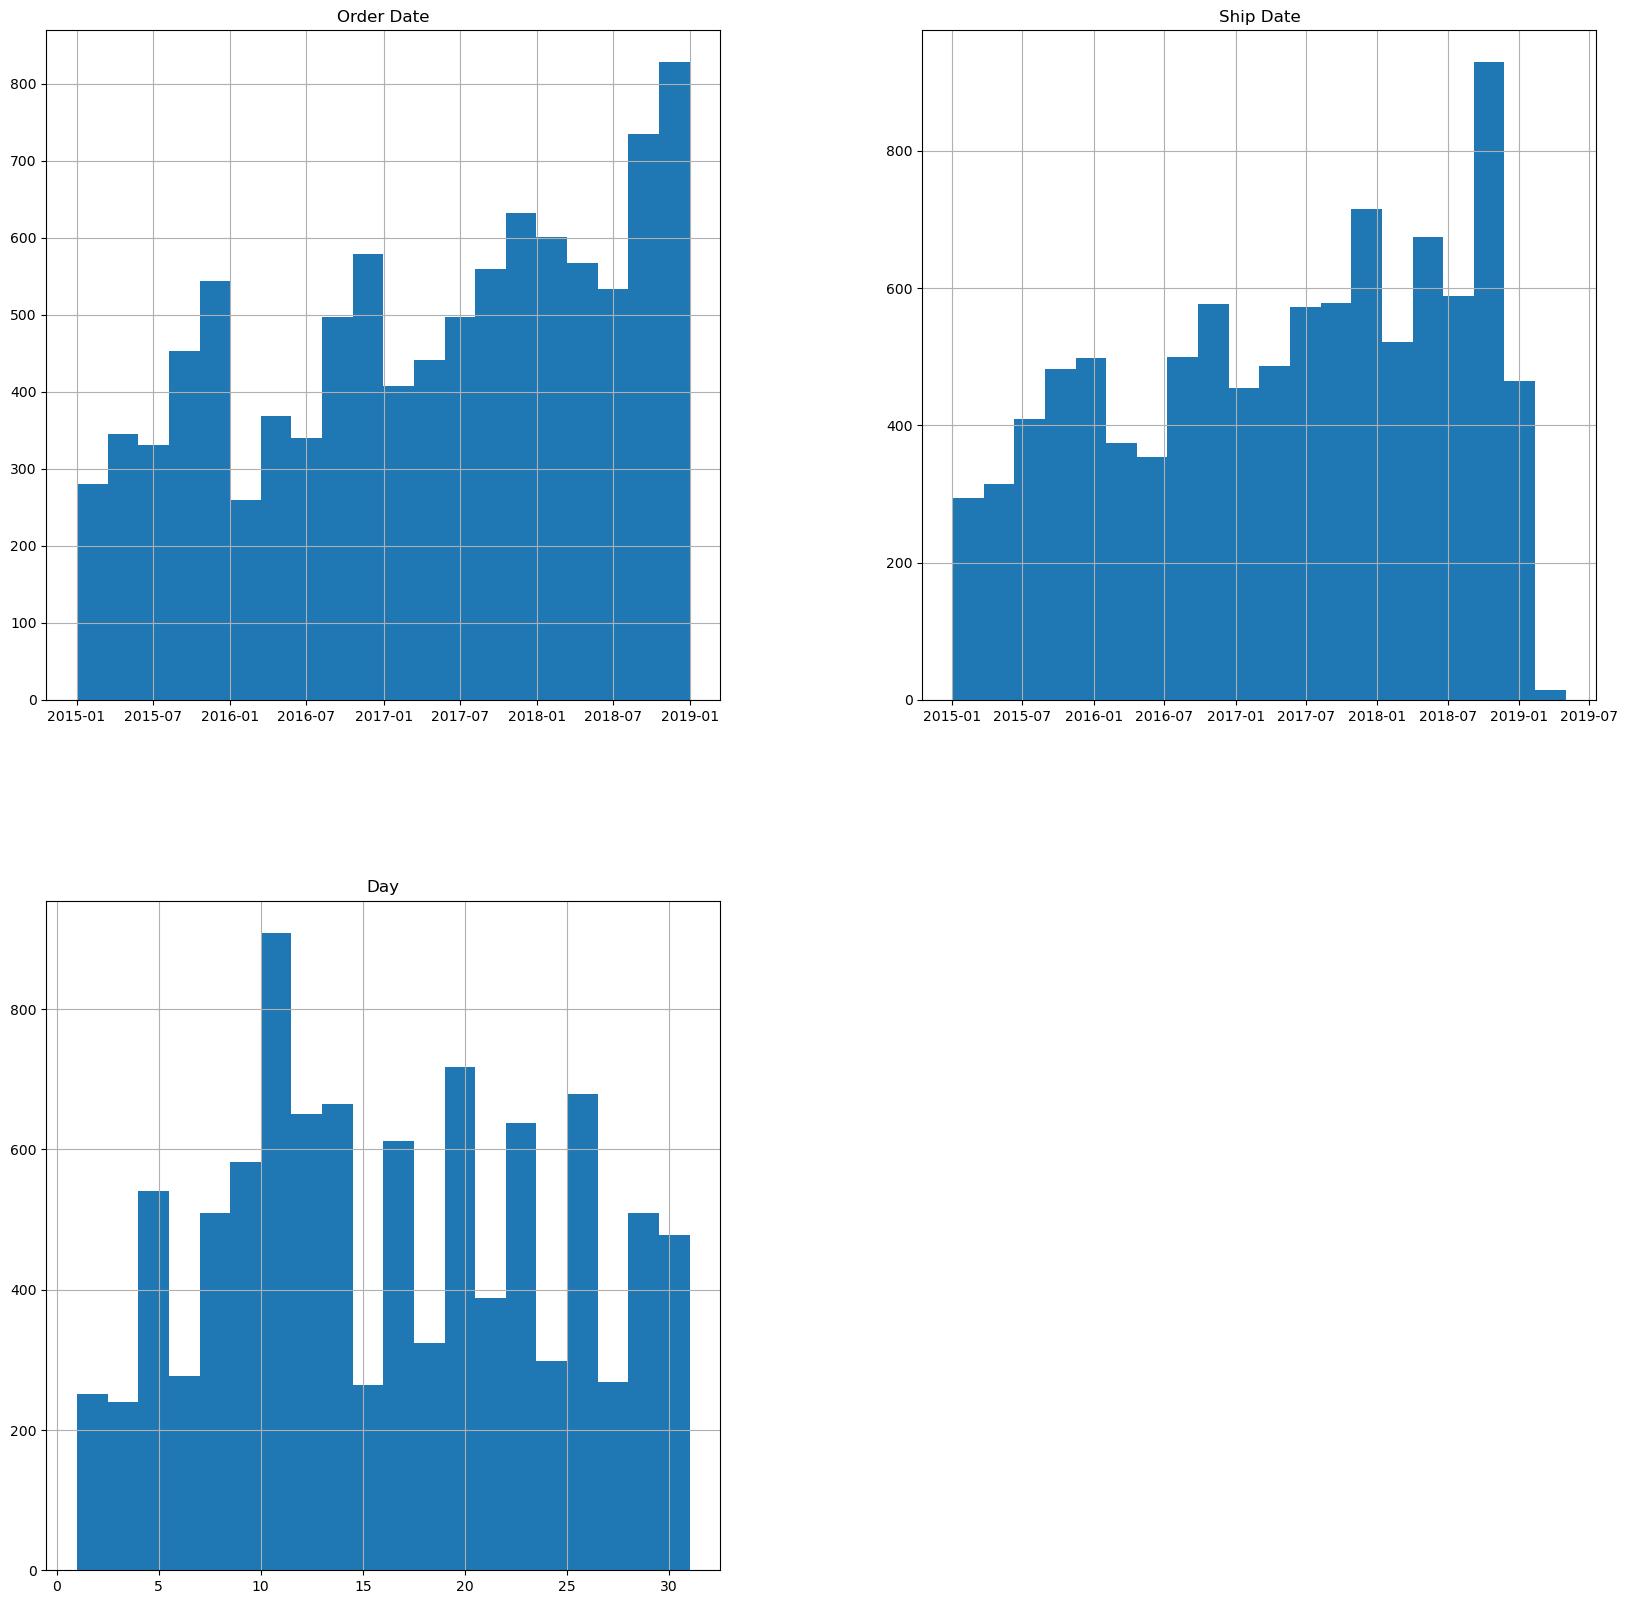

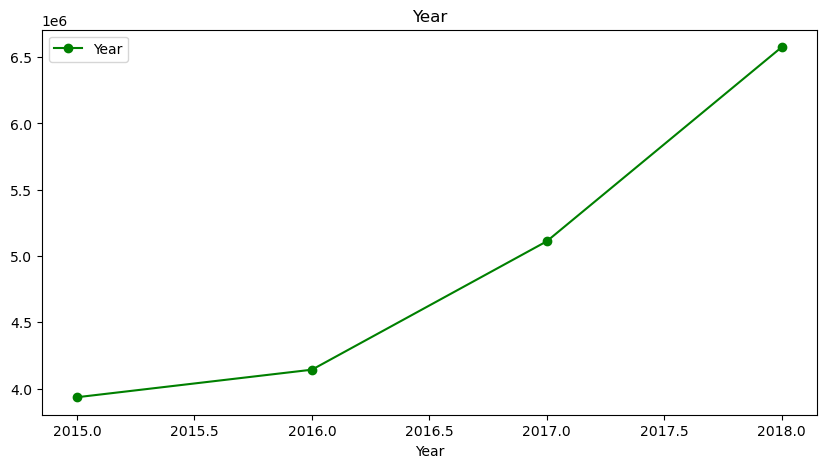

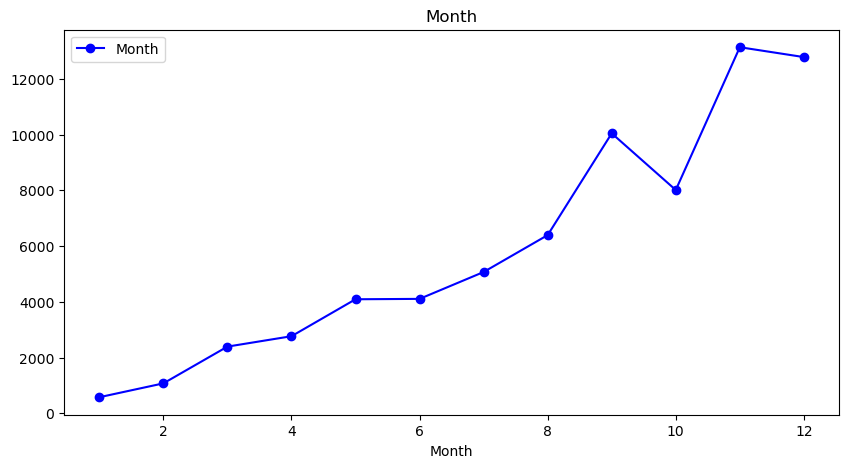

In [98]:
data[['Order Date','Ship Date','Day']].hist(bins=20,figsize=(20,20))

axis=data.groupby('Year')[['Year']].sum().plot(figsize=(10,5),marker='o',color='g')
axis.set_title('Year')

axis=data.groupby('Month')[['Month']].sum().plot(figsize=(10,5),marker='o',color='b')
axis.set_title('Month')

In [77]:
best_customer=data.pivot_table(values='Sales',index='Customer Name',aggfunc='sum')
best_customer=best_customer.sort_values(by=['Sales'],ascending=False).head(20)
best_customer.reset_index(inplace=True)
best_customer['Sales']=best_customer['Sales'].round()
best_customer

,Customer Name,Sales
0,Sean Miller,25043.0
1,Tamara Chand,19052.0
2,Raymond Buch,15117.0
3,Tom Ashbrook,14596.0
4,Adrian Barton,14474.0
5,Ken Lonsdale,14175.0
6,Sanjit Chand,14142.0
7,Hunter Lopez,12873.0
8,Sanjit Engle,12209.0
9,Christopher Conant,12129.0


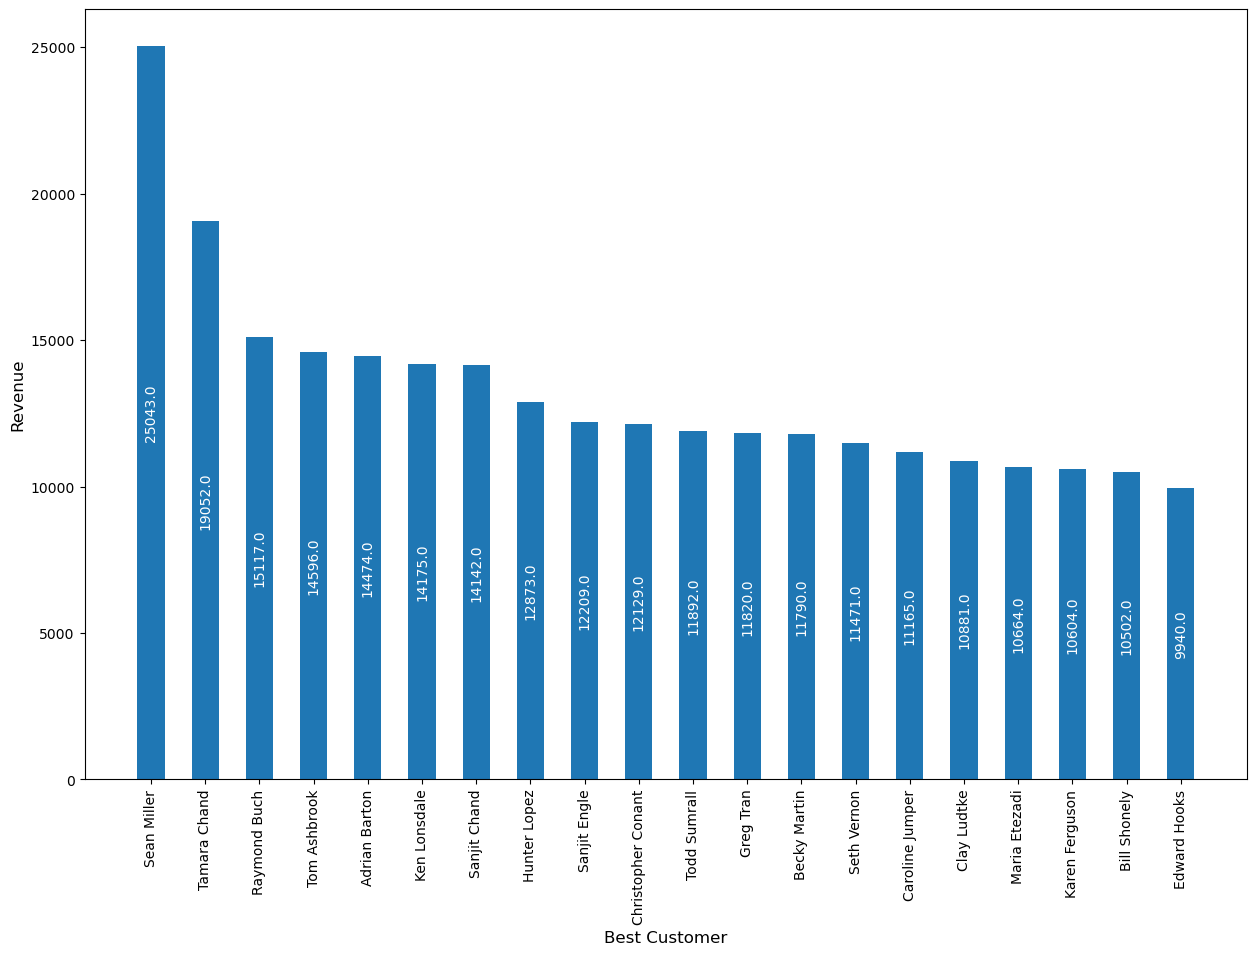

In [78]:
fig=plt.figure(figsize=(15,10))
plt.bar(best_customer['Customer Name'],best_customer['Sales'],width=0.5)
plt.xlabel('Best Customer',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

for i,v in enumerate(best_customer['Sales']):
    plt.text(i,v/2,str(v),ha='center',va='center',rotation=90,color='white')
plt.show()

In [79]:
best_cities=data.pivot_table(values='Sales',index='City',aggfunc='sum')
best_cities=best_cities.sort_values(by=['Sales'],ascending=False).head(20)
best_cities.reset_index(inplace=True)
best_cities['Sales']=best_cities['Sales'].round()
best_cities

,City,Sales
0,New York City,252463.0
1,Los Angeles,173420.0
2,Seattle,116106.0
3,San Francisco,109041.0
4,Philadelphia,108842.0
5,Houston,63956.0
6,Chicago,47820.0
7,San Diego,47521.0
8,Jacksonville,44713.0
9,Detroit,42447.0


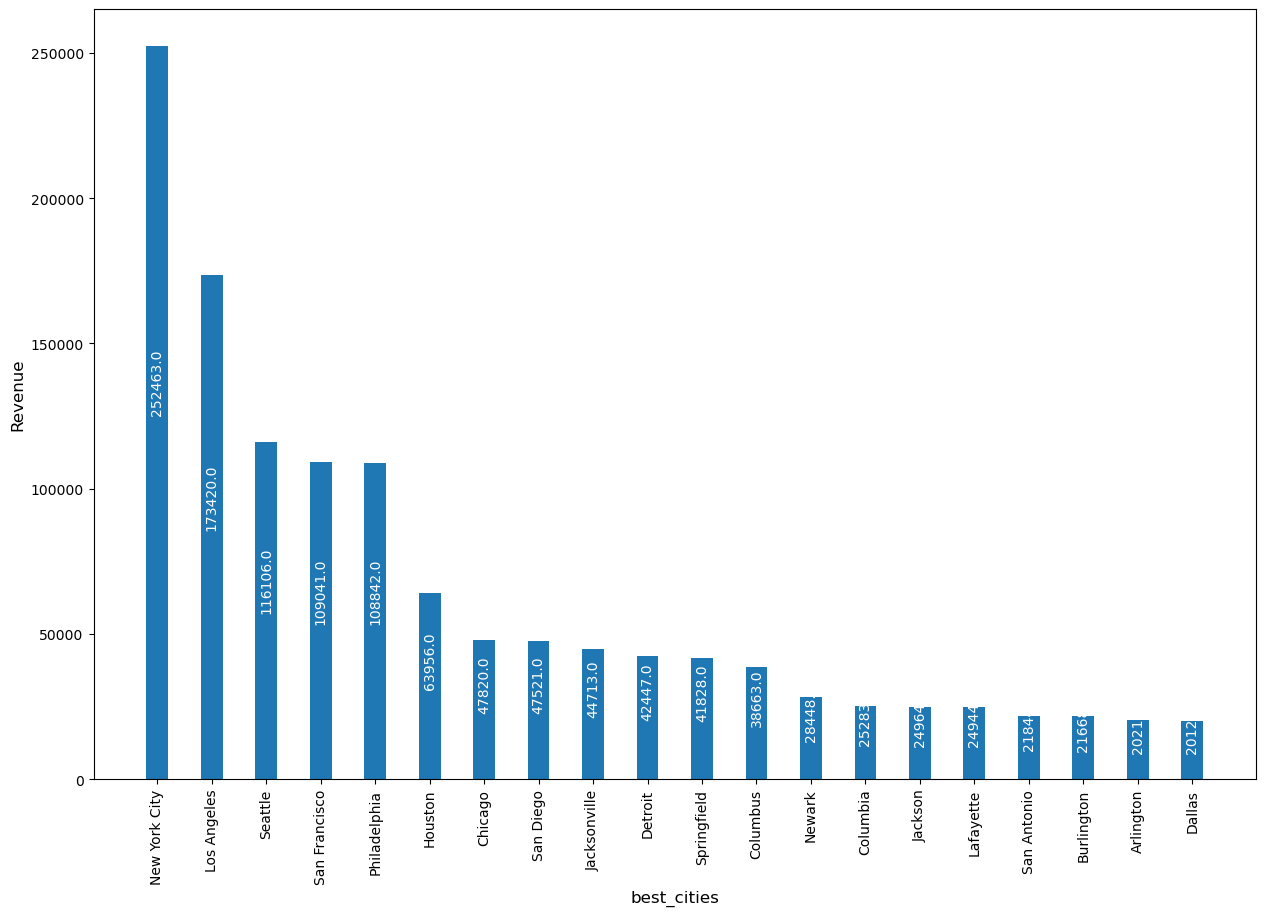

In [80]:
fig=plt.figure(figsize=(15,10))

plt.bar(best_cities['City'],best_cities['Sales'],width=0.4)
plt.xlabel('best_cities',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

for i,v in enumerate(best_cities['Sales']):
    plt.text(i,v/2,str(v),ha='center',rotation=90,color='white',fontsize=10)
plt.show()

In [81]:
best_dayofweek=data.pivot_table(values='Sales',index='Day of Week',aggfunc='sum')
best_dayofweek=best_dayofweek.sort_values(by=['Sales'],ascending=False).head(20)
best_dayofweek.reset_index(inplace=True)
best_dayofweek['Sales']=best_dayofweek['Sales'].round()
best_dayofweek

,Day of Week,Sales
0,Saturday,394511.0
1,Tuesday,369922.0
2,Monday,355653.0
3,Wednesday,332749.0
4,Sunday,322771.0
5,Friday,257430.0
6,Thursday,228501.0


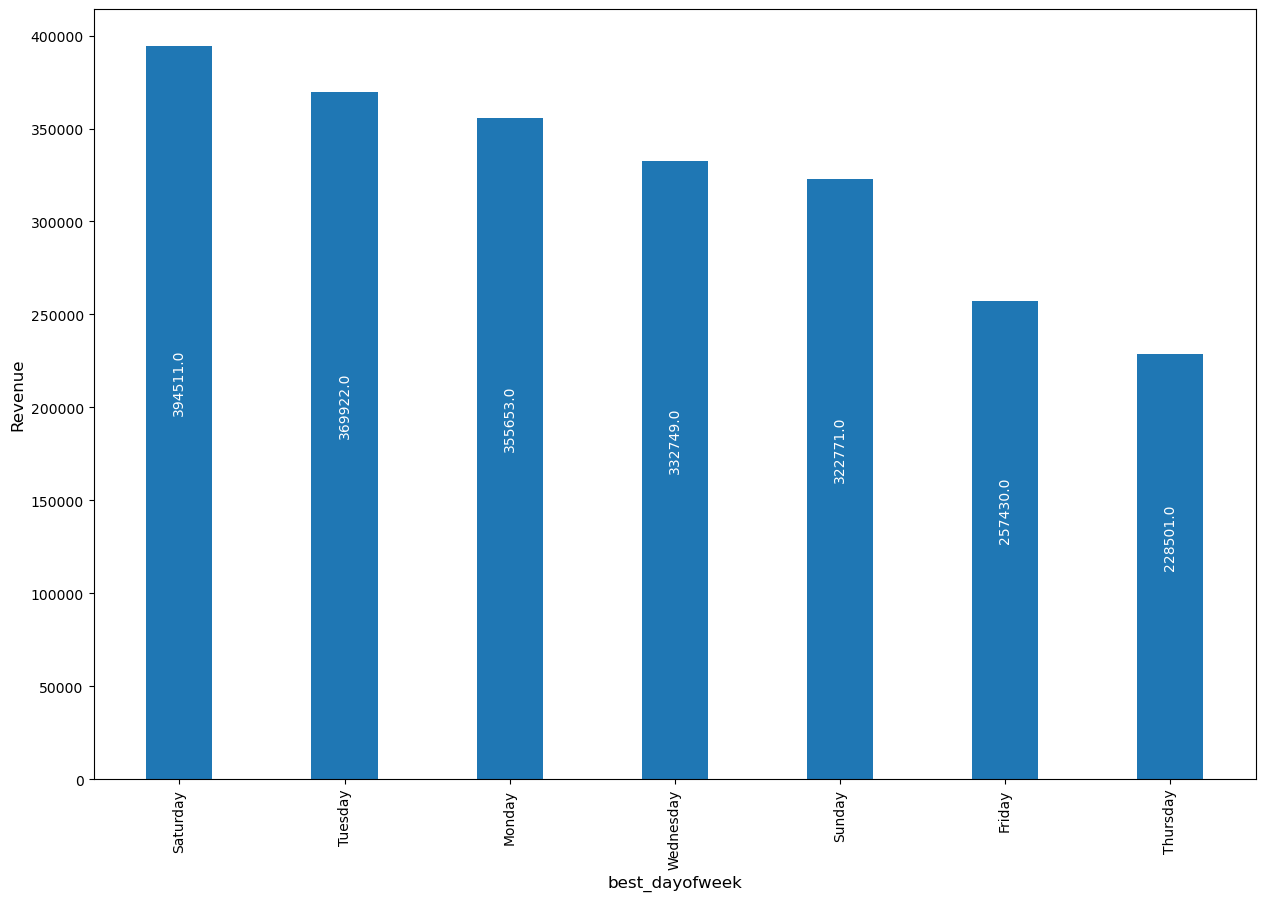

In [82]:
fig=plt.figure(figsize=(15,10))

plt.bar(best_dayofweek['Day of Week'],best_dayofweek['Sales'],width=0.4)
plt.xlabel('best_dayofweek',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

for i,v in enumerate(best_dayofweek['Sales']):
    plt.text(i,v/2,str(v),ha='center',rotation=90,color='white',fontsize=10)
plt.show()

In [83]:
best_category=data.pivot_table(values='Sales',index='Category',aggfunc='sum')
best_category=best_category.sort_values(by=['Sales'],ascending=False).head(20)
best_category.reset_index(inplace=True)
best_category['Sales']=best_category['Sales'].round()
best_category

,Category,Sales
0,Technology,827456.0
1,Furniture,728659.0
2,Office Supplies,705422.0


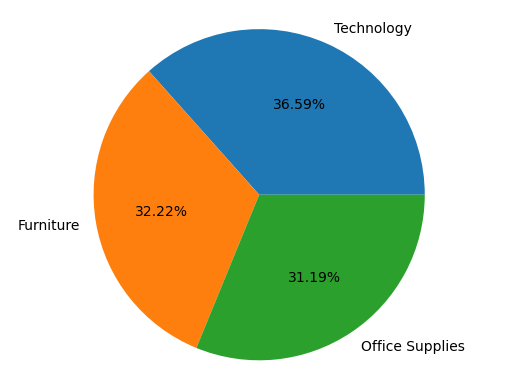

In [84]:
plt.pie(best_category['Sales'],labels=best_category['Category'],autopct='%1.2f%%')
plt.axis('equal')
plt.show()

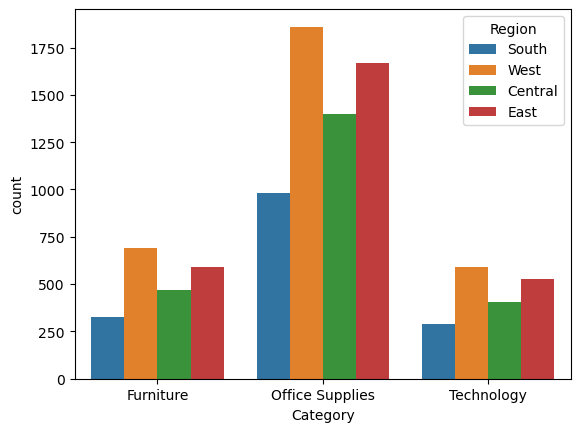

In [85]:
sns.countplot(data=data,x='Category',hue='Region')
plt.xticks()
plt.show()

Text(0.5, 1.0, 'No. of customers per Month')

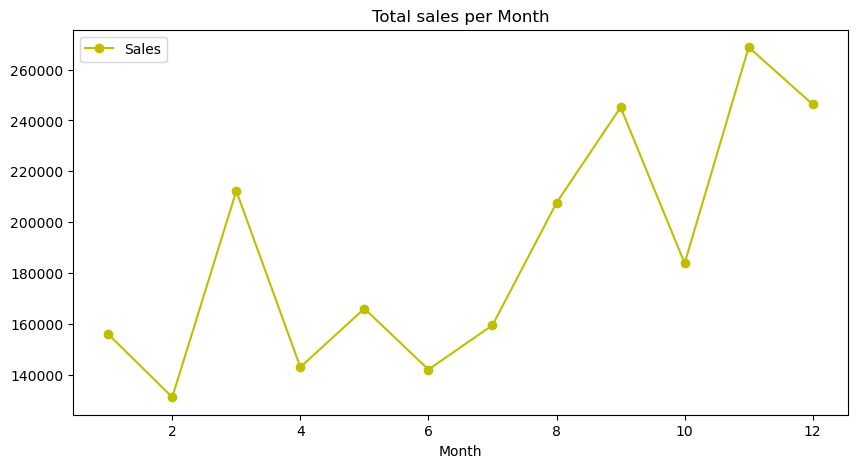

<Figure size 640x480 with 0 Axes>

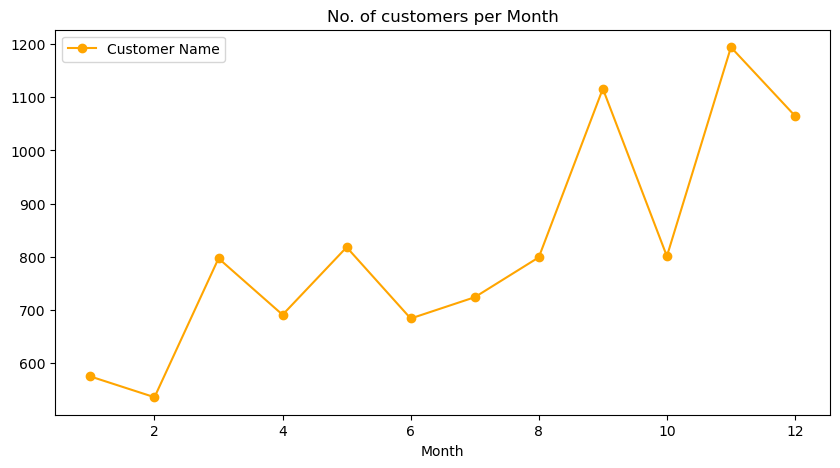

In [90]:
axis=data.groupby('Month')[['Sales']].sum().plot(figsize=(10,5),marker='o',color='y')
axis.set_title('Total sales per Month')

plt.figure()
axis=data.groupby('Month')[['Customer Name']].count().plot(figsize=(10,5),marker='o',color='orange')
axis.set_title('No. of customers per Month')

Text(0.5, 1.0, 'No. of customers per Day')

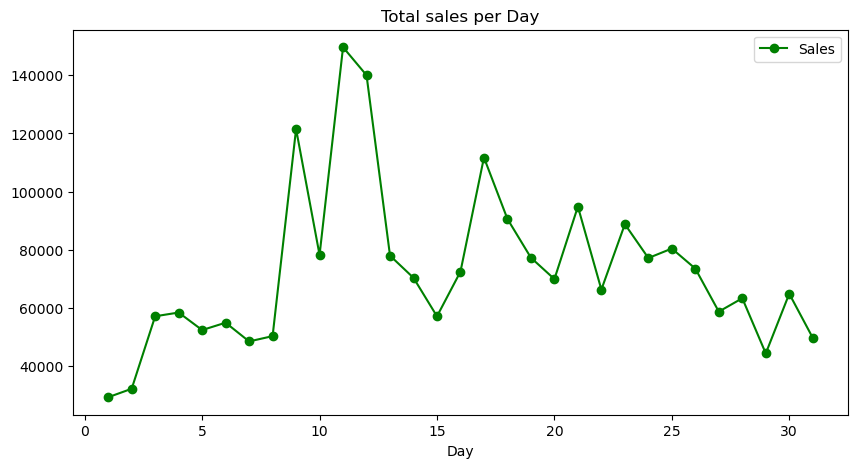

<Figure size 640x480 with 0 Axes>

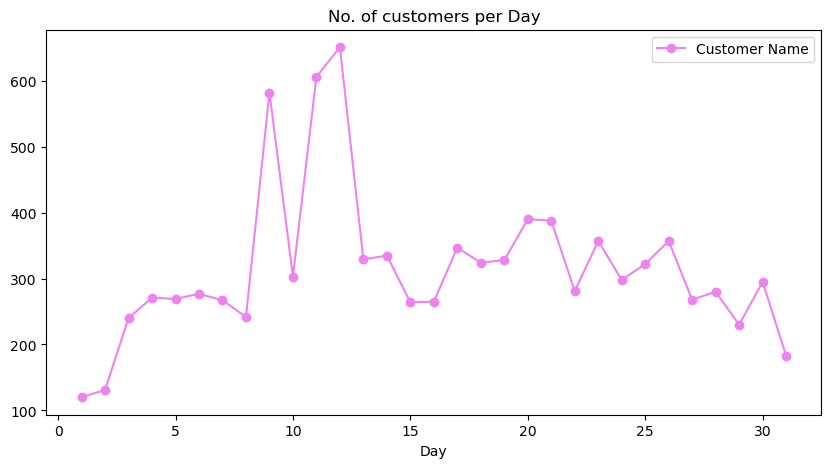

In [91]:
axis=data.groupby('Day')[['Sales']].sum().plot(figsize=(10,5),marker='o',color='g')
axis.set_title('Total sales per Day')

plt.figure()
axis=data.groupby('Day')[['Customer Name']].count().plot(figsize=(10,5),marker='o',color='violet')
axis.set_title('No. of customers per Day')